## Load data

In [1]:
from dmml_project.dataset import Dataset
from dmml_project import PROJECT_ROOT
import matplotlib.pyplot as plt
import seaborn as sns

dataset: Dataset = Dataset.load(f'{PROJECT_ROOT}/data/dataset.tsv')

## Data exploration

### Class distribution

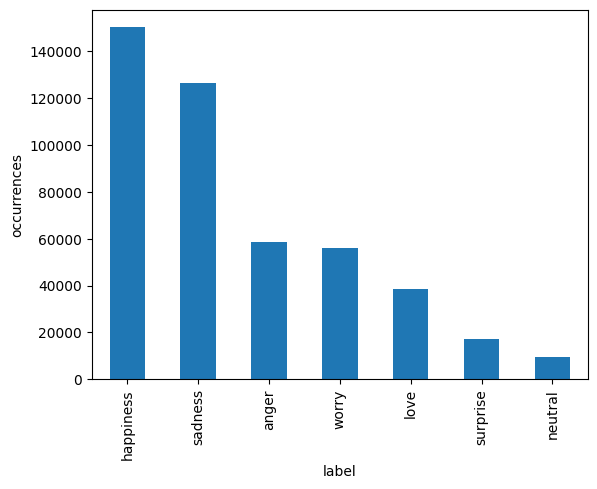

In [2]:
dataset.data['label'].value_counts().plot(kind='bar', xlabel='label', ylabel='occurrences')
plt.show()

### Length distribution

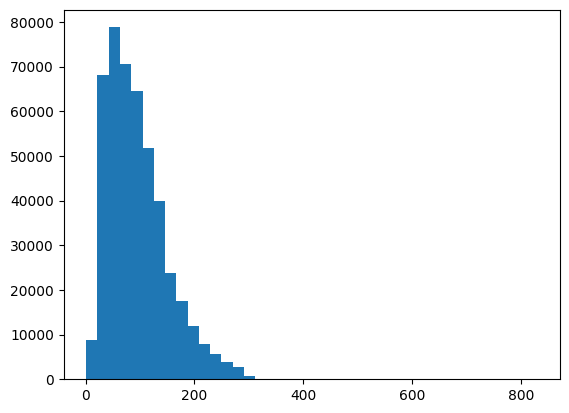

In [3]:
plt.hist([len(x) for x in dataset.data['text']], bins=40)
plt.show()

## Preprocessing

In [4]:
from dmml_project.preprocessor import Preprocessor
from dmml_project import PROJECT_ROOT

pp: Preprocessor = Preprocessor.load(f"{PROJECT_ROOT}/data/preprocessor/tfidf.pkl")

In [5]:
random_examples = dataset.data['text'].sample(5)
print("Before preprocessing:")
print(random_examples)
print("After preprocessing:")
print(pp(random_examples))

Before preprocessing:
422573              i feel anything but passionate emotions
270492    i know im in the wrong i will apologize i will...
386484    i feel awful when i worry and the only one who...
120869    i kinda feel like i m airing my dirty laundry ...
253462    i could not help but feel melancholy at its ar...
Name: text, dtype: object
After preprocessing:
  (0, 2065)	0.5443547646573423
  (0, 14194)	0.5648809299623606
  (0, 15793)	0.11287006775981195
  (0, 34652)	0.6097932214805306
  (1, 2150)	0.5871593664467791
  (1, 15793)	0.0831421545099824
  (1, 22179)	0.23472787013839175
  (1, 25420)	0.2919590513899013
  (1, 38786)	0.5538270016168889
  (1, 52847)	0.44863086397293817
  (2, 3123)	0.35655582215036
  (2, 9644)	0.36691395570232854
  (2, 15793)	0.06119647625695822
  (2, 29800)	0.32801221712908873
  (2, 33373)	0.2361593836475253
  (2, 33408)	0.27165708216306594
  (2, 52729)	0.7052207078179226
  (3, 967)	0.3406368078637732
  (3, 12180)	0.3176272844755247
  (3, 15793)	0.051765544

In [6]:
violin_plot_data = dataset.data.copy()
violin_plot_data['len'] = violin_plot_data['text'].apply(lambda x: len(x))

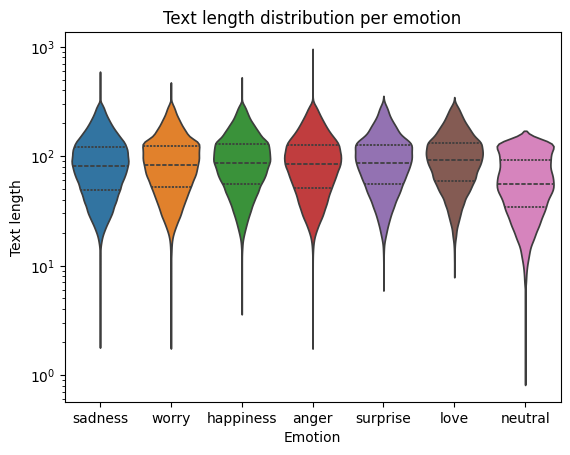

In [7]:
sns.violinplot(data=violin_plot_data, x='label', y='len', hue='label', inner='quartile', log_scale=True).set_title('Text length distribution per emotion')
plt.xlabel('Emotion')
plt.ylabel('Text length')
plt.show()